## Concluding remarks and Renku Knowledge Graph

In [1]:
from IPython.core.display import display, HTML, Image
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import yaml
import pyjq
import pandas as pd

import pydot

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

from PIL import Image as pilim

from tabulate import tabulate
import textwrap
from columnize import columnize

import os
import glob

In [3]:
pd.options.display.max_colwidth = 0 
pd.options.display.max_columns = None
pd.set_option('display.width', 1000)

-------------------------

### Review the Project's artifacts

In [4]:
!pwd

/notebooks/nlp-clinical-vignettes/notebooks


In [5]:
%%bash

cd ..

tree -L 1 .

.
├── Dockerfile
├── README.md
├── README_TECHNICAL.md
├── data
├── environment.yml
├── notebooks
├── requirements.txt
└── src

3 directories, 5 files


In [6]:
%%bash

cd ../src

tree -L 2 .

.
└── py_scripts
    ├── __pycache__
    ├── bner_drugbank.py
    ├── bner_scispacy.py
    ├── consolidate_results.py
    ├── create_result_pdf.py
    ├── drugdrug_interactions_drugbank.py
    ├── entities_in_context.py
    ├── extract_book_pages.py
    └── preprocess_drugbank_vocab.py

2 directories, 8 files


In [7]:
%%bash

cd ../data

tree -L 2 .

.
├── book_clinical_cases
│   └── JMD-Cases-of-Interest.pdf
├── drugbank_vocab
│   └── drugbank_all_drugbank_vocabulary.csv.zip
├── errors
│   └── errors_selection1.json
├── outputs
│   ├── consolidated_bner_selection1.bin
│   ├── drugdrug_interactions_selection1.json
│   ├── medication_bner_selection1.json
│   ├── structured_bner_selection1.bin
│   ├── vignettes_selection1.json
│   ├── vignettes_selection1_bc5cdr.json
│   └── vignettes_selection1_bionlp13cg.json
├── tmp_files
│   ├── drugbank_vocab.json
│   └── pages_selection.txt
└── vignettes_reports
    ├── Report_Page_114.html
    ├── Report_Page_114.pdf
    ├── Report_Page_116.html
    ├── Report_Page_116.pdf
    ├── Report_Page_120.html
    ├── Report_Page_120.pdf
    ├── Report_Page_14.html
    ├── Report_Page_14.pdf
    ├── Report_Page_140.html
    ├── Report_Page_140.pdf
    ├── Report_Page_160.html
    ├── Report_Page_160.pdf
    ├── Report_Page_208.html
    ├── Report_Page_208.pdf
    ├── Report_Page_24.html
    ├── Report_

---------------------

### Datasets created and used

In [8]:
#intentionaly ask for column inexistant, to force it show acceptable values for --columns 
!cd .. && \
 renku dataset ls --columns inexistant

!echo "-------------------------------------------------------------------------------------"

!cd .. && \
 renku dataset ls --columns id,name,title,keywords

Error: Invalid parameter value - Invalid column name: "inexistant".
Possible values: id, created, date_created, short_name, name, creators, creators_full, tags, version, title, keywords, description
-------------------------------------------------------------------------------------
ID                                    NAME                 TITLE                                                                KEYWORDS
------------------------------------  -------------------  -------------------------------------------------------------------  ------------------------------------------
6bdd2e04-9c88-4415-9de6-bc7b21e2be33  drugbank_vocab       DrugBank Vocabulary                                                  drugbank,medication,csv
f71677c9-ea04-48a7-892d-fd8b85fffb73  book_clinical_cases  Interesting Clinical Vignettes: 101 Ice Breakers for Medical Rounds  clinical cases,clinical vignettes,book,pdf


In [9]:
#intentionaly ask for column inexistant, to force it show acceptable values for --columns 
!cd .. && \
 renku dataset ls-files --columns inexistant

!echo "-------------------------------------------------------------------------------------"

!cd .. && \
 renku dataset ls-files


Error: Invalid parameter value - Invalid column name: "inexistant".
Possible values: added, commit, creators, creators_full, dataset, full_path, path, short_name, dataset_name, size, lfs
-------------------------------------------------------------------------------------
DATASET NAME         ADDED                  SIZE  PATH                                                          LFS
-------------------  -------------------  ------  ------------------------------------------------------------  -----
book_clinical_cases  2021-07-13 08:39:44  1.2 MB  data/book_clinical_cases/JMD-Cases-of-Interest.pdf            *
drugbank_vocab       2021-07-13 08:42:07  773 KB  data/drugbank_vocab/drugbank_all_drugbank_vocabulary.csv.zip  *


```

````

**Note / Observation:**

the URL from which the file was copied over to the dataset is not among the selectable columns yet, so we can't show
that data/book_clinical_cases/JMD-Cases-of-Interest.pdf was copied over from https://www.ttuhsc.edu/clinical-research/documents/JMD-Cases-of-Interest.pdf

However, this info is available in the YAML file of the dataset under `https://swissdatasciencecenter.github.io/renku-ontology#source:`:

```

```

In [10]:
!ls -l ../.renku/datasets/
!echo -e "===========================================================================\n"
!head -c 500 ../.renku/datasets/4b7d7b8a-f536-4d62-8bdd-136d5872a034/metadata.yml

total 8
drwxr-xr-x 2 root root 4096 Jul 13 08:39 4b7d7b8a-f536-4d62-8bdd-136d5872a034
drwxr-xr-x 2 root root 4096 Jul 13 08:41 567569cb-0545-4d3d-98ad-2e15784d6e80
-e ===========================================================================

- '@id': https://localhost/urls/%2F%2Frenkulab.io%2Fdatasets%2F4b7d7b8a-f536-4d62-8bdd-136d5872a034
  '@type':
  - http://schema.org/URL
  http://schema.org/url:
  - '@id': https://renkulab.io/datasets/4b7d7b8a-f536-4d62-8bdd-136d5872a034
- '@id': https://renkulab.io/blob/fddc3dbb4bd184ce615ada7e2ac452c5f6a3db97/data/book_clinical_cases/JMD-Cases-of-Interest.pdf
  '@type':
  - http://purl.org/wf4ever/wfprov#Artifact
  - http://schema.org/DigitalDocument
  - http://www.w3.org/ns/prov#Entity
  htt

In [11]:
with open("../.renku/datasets/4b7d7b8a-f536-4d62-8bdd-136d5872a034/metadata.yml", "r") as f:
    ds_meta = yaml.safe_load(f)

ds_meta[0]

{'@id': 'https://localhost/urls/%2F%2Frenkulab.io%2Fdatasets%2F4b7d7b8a-f536-4d62-8bdd-136d5872a034',
 '@type': ['http://schema.org/URL'],
 'http://schema.org/url': [{'@id': 'https://renkulab.io/datasets/4b7d7b8a-f536-4d62-8bdd-136d5872a034'}]}

In [12]:
ds_allkeys = pyjq.all(".[] | keys", ds_meta)
ds_allkeys

[['@id', '@type', 'http://schema.org/url'],
 ['@id',
  '@type',
  'http://schema.org/dateCreated',
  'http://schema.org/isPartOf',
  'http://schema.org/name',
  'http://schema.org/url',
  'http://www.w3.org/2000/01/rdf-schema#label',
  'http://www.w3.org/ns/prov#atLocation',
  'https://swissdatasciencecenter.github.io/renku-ontology#external',
  'https://swissdatasciencecenter.github.io/renku-ontology#source'],
 ['@id',
  '@type',
  'http://schema.org/alternateName',
  'http://schema.org/creator',
  'http://schema.org/dateCreated',
  'http://schema.org/description',
  'http://schema.org/hasPart',
  'http://schema.org/identifier',
  'http://schema.org/isPartOf',
  'http://schema.org/keywords',
  'http://schema.org/name',
  'http://schema.org/subjectOf',
  'http://schema.org/url',
  'http://www.w3.org/2000/01/rdf-schema#label',
  'http://www.w3.org/ns/prov#atLocation',
  'http://www.w3.org/ns/prov#wasDerivedFrom'],
 ['@id',
  '@type',
  'http://schema.org/agent',
  'http://schema.org/cre

In [13]:
ds_file = ds_meta[1]["http://schema.org/name"][0]["@value"]
ds_file_source = ds_meta[1]["https://swissdatasciencecenter.github.io/renku-ontology#source"][0]["@value"]

print("Dataset file {}  --->  has source:{} ".format(ds_file, ds_file_source))

Dataset file JMD-Cases-of-Interest.pdf  --->  has source:https://www.ttuhsc.edu/clinical-research/documents/JMD-Cases-of-Interest.pdf 


```

```
**Now use the REST API of the Renku Knowledge Graph:**

In [14]:
!wget  -qO-  "https://renkulab.io/knowledge-graph/projects/ciolac_c/nlp-clinical-vignettes/datasets"   |  python -m json.tool

[
    {
        "_links": [
            {
                "rel": "details",
                "href": "https://renkulab.io/knowledge-graph/datasets/6bdd2e04-9c88-4415-9de6-bc7b21e2be33"
            },
            {
                "rel": "initial-version",
                "href": "https://renkulab.io/knowledge-graph/datasets/567569cb-0545-4d3d-98ad-2e15784d6e80"
            }
        ],
        "derivedFrom": "https://renkulab.io/datasets/567569cb-0545-4d3d-98ad-2e15784d6e80",
        "identifier": "6bdd2e04-9c88-4415-9de6-bc7b21e2be33",
        "versions": {
            "initial": "567569cb-0545-4d3d-98ad-2e15784d6e80"
        },
        "title": "DrugBank Vocabulary",
        "name": "drugbank_vocab",
        "images": []
    },
    {
        "_links": [
            {
                "rel": "details",
                "href": "https://renkulab.io/knowledge-graph/datasets/f71677c9-ea04-48a7-892d-fd8b85fffb73"
            },
            {
                "rel": "initial-version",
        

------------------

## Discoverability


### REST API - Search for Projects

Note that at the moment we can't query projects in the knowledge graph in the same way we query datasets (see below), i.e.  

In [15]:
!wget  "https://renkulab.io/knowledge-graph/projects?query=clinical"

--2021-07-17 17:45:44--  https://renkulab.io/knowledge-graph/projects?query=clinical
Resolving renkulab.io (renkulab.io)... 86.119.39.204
Connecting to renkulab.io (renkulab.io)|86.119.39.204|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-17 17:45:45 ERROR 404: Not Found.



**However, we can use another API endpoint instead:**

In [16]:
!wget  -qO-  "https://renkulab.io/api/projects?search=clinical&page=1&per_page=10&order_by=last_activity_at&sort=desc"  |  python -m json.tool

[
    {
        "id": 12502,
        "description": null,
        "name": "NLP Clinical Vignettes ",
        "name_with_namespace": "Camelia Ciolac / NLP Clinical Vignettes ",
        "path": "nlp-clinical-vignettes",
        "path_with_namespace": "ciolac_c/nlp-clinical-vignettes",
        "created_at": "2021-07-13T08:27:36.411Z",
        "default_branch": "master",
        "tag_list": [
            "bner",
            "drugbank",
            "medspacy",
            "nlp",
            "scispacy"
        ],
        "ssh_url_to_repo": "git@renkulab.io:ciolac_c/nlp-clinical-vignettes.git",
        "http_url_to_repo": "https://renkulab.io/gitlab/ciolac_c/nlp-clinical-vignettes.git",
        "web_url": "https://renkulab.io/gitlab/ciolac_c/nlp-clinical-vignettes",
        "readme_url": "https://renkulab.io/gitlab/ciolac_c/nlp-clinical-vignettes/-/blob/master/README.md",
        "avatar_url": null,
        "forks_count": 0,
        "star_count": 0,
        "last_activity_at": "2021-07-17T13:

**Further on, we can use GitLab's API to get the tree of the repo:**  
See:
https://docs.gitlab.com/ee/api/repositories.html   
https://renkulab.io/gitlab/help    
https://renkulab.io/gitlab/help/api/repositories.md  
https://renkulab.io/gitlab/help/api/README.md#namespaced-path-encoding

In [17]:
%%bash

PROJECT_ENC="ciolac_c%2Fnlp-clinical-vignettes"

wget  --no-check-certificate -O /tmp/gitlab_repo_info.json \
     "https://renkulab.io/gitlab/api/v4/projects/$PROJECT_ENC/repository/tree?recursive=true&per_page=200" 

--2021-07-17 17:45:52--  https://renkulab.io/gitlab/api/v4/projects/ciolac_c%2Fnlp-clinical-vignettes/repository/tree?recursive=true&per_page=200
Resolving renkulab.io (renkulab.io)... 86.119.39.204
Connecting to renkulab.io (renkulab.io)|86.119.39.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/json]
Saving to: ‘/tmp/gitlab_repo_info.json’

     0K .......... ....                                         101K=0.1s

2021-07-17 17:45:53 (101 KB/s) - ‘/tmp/gitlab_repo_info.json’ saved [15183]



In [18]:
%%bash

cat /tmp/gitlab_repo_info.json |  jq '[.[] | .path]' | sort | xargs -L3 | column -t



.dockerignore,                                                    .gitattributes,                                                     .gitignore,
.gitlab-ci.yml,                                                   .renku,                                                             .renku/activity_index.yaml,
.renku/datasets,                                                  .renku/datasets/4b7d7b8a-f536-4d62-8bdd-136d5872a034,               .renku/datasets/4b7d7b8a-f536-4d62-8bdd-136d5872a034/metadata.yml,
.renku/datasets/567569cb-0545-4d3d-98ad-2e15784d6e80,             .renku/datasets/567569cb-0545-4d3d-98ad-2e15784d6e80/metadata.yml,  .renku/metadata.yml,
.renku/refs,                                                      .renku/refs/datasets,                                               .renku/refs/datasets/book_clinical_cases,
.renku/refs/datasets/drugbank_vocab,                              .renku/renku.ini,                                                   .renku/template_checksums.

--------------------

**Now search projects by other terms:**

In [19]:
%%bash

declare -a arr_keywords=("health" "disease" "treatment" "biomarker")

for kw in "${arr_keywords[@]}"
do
    echo  "PROJECTS FOR: $kw"
    prj=$(wget  -qO-  "https://renkulab.io/api/projects?search=$kw&page=1&per_page=10&order_by=last_activity_at&sort=desc")

    echo $prj | jq  '.[] | {"name" : .name,   "path": .path_with_namespace,  "tag_list" : .tag_list, "last_activity_at" : .last_activity_at  }'

    echo "============================================================================================================"
done


PROJECTS FOR: health
{
  "name": "covid-19-forecast",
  "path": "covid-19/covid-19-forecast",
  "tag_list": [],
  "last_activity_at": "2021-07-17T11:08:22.898Z"
}
{
  "name": "kotliarov2020_pbmc",
  "path": "omnibenchmark/omni_data/kotliarov2020_pbmc",
  "tag_list": [],
  "last_activity_at": "2021-03-18T15:43:11.326Z"
}
{
  "name": "Addressing the issue of data incongruity in public health data",
  "path": "alanwolf/addressing-the-issue-of-data-incongruity-in-public-health-data",
  "tag_list": [],
  "last_activity_at": "2020-09-28T19:51:11.572Z"
}
{
  "name": "envhealth",
  "path": "emma.jablonski/envhealth",
  "tag_list": [],
  "last_activity_at": "2019-11-25T09:13:52.808Z"
}
{
  "name": "envhealth",
  "path": "cchoirat/envhealth",
  "tag_list": [],
  "last_activity_at": "2019-11-23T06:44:38.981Z"
}
{
  "name": "public-health",
  "path": "cramakri/public-health",
  "tag_list": [],
  "last_activity_at": "2019-02-15T14:31:38.971Z"
}
PROJECTS FOR: disease
{
  "name": "covid 19 modeling",

**Note:** the majority of the above projects don't have tags nor description, because these metadata are not being asked for upon project creation in the platform. It is post-creation that the user can update these under "Settings" tab of the project.

---------------------------

### REST API - Search for Datasets

In [20]:
#search datasets related to the term "clinical"

!wget  -qO-  "https://renkulab.io/knowledge-graph/datasets?query=clinical"  |  python -m json.tool

[
    {
        "_links": [
            {
                "rel": "details",
                "href": "https://renkulab.io/knowledge-graph/datasets/f71677c9-ea04-48a7-892d-fd8b85fffb73"
            }
        ],
        "description": "Texas Tech University Health Sciences Center, https://www.ttuhsc.edu/clinical-research/vignettes.aspx",
        "identifier": "f71677c9-ea04-48a7-892d-fd8b85fffb73",
        "title": "Interesting Clinical Vignettes: 101 Ice Breakers for Medical Rounds",
        "name": "book_clinical_cases",
        "published": {
            "creator": [
                {
                    "email": "ciolac_c@yahoo.co.uk",
                    "name": "ciolac_c"
                }
            ]
        },
        "date": "2021-07-13T08:39:44.624658Z",
        "projectsCount": 1,
        "keywords": [
            "clinical cases,clinical vignettes,book,pdf"
        ],
        "images": []
    }
]


**Get more metadata about this dataset of ths project**

In [21]:
!wget  -qO-  "https://renkulab.io/knowledge-graph/datasets/f71677c9-ea04-48a7-892d-fd8b85fffb73"   |  python -m json.tool

{
    "_links": [
        {
            "rel": "self",
            "href": "https://renkulab.io/knowledge-graph/datasets/f71677c9-ea04-48a7-892d-fd8b85fffb73"
        },
        {
            "rel": "initial-version",
            "href": "https://renkulab.io/knowledge-graph/datasets/4b7d7b8a-f536-4d62-8bdd-136d5872a034"
        }
    ],
    "identifier": "f71677c9-ea04-48a7-892d-fd8b85fffb73",
    "name": "book_clinical_cases",
    "title": "Interesting Clinical Vignettes: 101 Ice Breakers for Medical Rounds",
    "url": "https://renkulab.io/datasets/f71677c9-ea04-48a7-892d-fd8b85fffb73",
    "derivedFrom": "https://renkulab.io/datasets/4b7d7b8a-f536-4d62-8bdd-136d5872a034",
    "versions": {
        "initial": "4b7d7b8a-f536-4d62-8bdd-136d5872a034"
    },
    "description": "Texas Tech University Health Sciences Center, https://www.ttuhsc.edu/clinical-research/vignettes.aspx",
    "published": {
        "creator": [
            {
                "name": "ciolac_c",
                "em

**Extend the datasets search with a broader term "health"** (instead of "clinical").  
Note that the term is searched in several fields of the dataset's metadata.  
Also use JQ to project on specific fields of the payoad:

In [22]:
%%bash

ds=$(wget  -qO-  "https://renkulab.io/knowledge-graph/datasets?query=health")

ii=0
jq_expr=`cat << EOM
          . | {"title" : .title,
               "name": .name,  
               "description" : .description , 
               "keywords" :.keywords, 
               "date": .date, 
               "link" : ._links[0].href, 
               "id": .identifier,
               "files" : ([.hasPart[] | .atLocation]),
               "projects" : ([.usedIn[] | {"name" : .name, "details" : ._links[0].href } ])
              }
EOM
`

echo "JQ EXPR: $jq_expr"
echo -e "\n________________________________________________________________________\n"

for dsid in $(echo $ds |  jq  ' [.[] | .identifier] ')
do
    dsid_noquotes=$(echo "$dsid" | tr -d '"' | tr -d ',')
    #echo "$dsid --> $dsid_noquotes"
    
    if [ "$dsid" != "[" ] && [ "$dsid" != "]" ] 
    then
        url_details="https://renkulab.io/knowledge-graph/datasets/$dsid_noquotes"
        echo "URL: $url_details"
        echo "------------------------------------------------------------------"
        
        ds_details=$(wget  -qO-  "$url_details")
        
        #echo "$ds_details"
        
        extracted_fields=$(echo "$ds_details" | jq "$jq_expr")
        
        echo "$extracted_fields" 
    
        ii=$((ii + 1))
    fi
    
    
    echo "=================================================================="
done

echo "IN TOTAL: $ii DATASETS WERE FOUND"

JQ EXPR:           . | {"title" : .title,
               "name": .name,  
               "description" : .description , 
               "keywords" :.keywords, 
               "date": .date, 
               "link" : ._links[0].href, 
               "id": .identifier,
               "files" : ([.hasPart[] | .atLocation]),
               "projects" : ([.usedIn[] | {"name" : .name, "details" : ._links[0].href } ])
              }

________________________________________________________________________

URL: https://renkulab.io/knowledge-graph/datasets/f71677c9-ea04-48a7-892d-fd8b85fffb73
------------------------------------------------------------------
{
  "title": "Interesting Clinical Vignettes: 101 Ice Breakers for Medical Rounds",
  "name": "book_clinical_cases",
  "description": "Texas Tech University Health Sciences Center, https://www.ttuhsc.edu/clinical-research/vignettes.aspx",
  "keywords": [
    "clinical cases,clinical vignettes,book,pdf"
  ],
  "date": null,
  "link": "https

----------------

### Workflows

In [23]:
!cd .. && \
 renku workflow ls --columns inexistant

!echo "-------------------------------------------------------------------------------------"

!cd .. && \
 renku workflow ls 

Usage: renku workflow ls [OPTIONS]
Try 'renku workflow ls -h' for help.

Error: no such option: --columns
-------------------------------------------------------------------------------------
8fb1abd410d447c2893ff44f2e38e9b3_python.yaml: 
7f89a72a91114098a637ae2ecef2ccfb_python.yaml: 
3cb740464d9c4519aba76f395568b861_python.yaml: 
9bf83a472bd94c87989c91e4613d0547_python.yaml: 
802440cf3df54f43985638543c9c9064_python.yaml: 
8710de739c144d02a80ca83d8f663502_python.yaml: 
94438762eb5345f09a54667c25df6342_python.yaml: 
ea7202cf73774b09a73014a1ed03b532_papermill.yaml: 
fac6559d561f47688ed173ca7132c9c0_python.yaml: 
b53c5a4ef0bb48c1a0099f4e0d33ecdf_python.yaml: 
874029f32fc7449a96a3cbb65603debc_python.yaml: 
7e53a7da507a45c7aa72fe6c8f50c155_python.yaml: 
d2b3b40ae03d40dc802c0619cda216f3_python.yaml: 
fd312c44bd2b4efe965f8532df6ae62c_python.yaml: 


**Note:**

The above cli command doesn't accept `--columns` to be specified, however we can extract metadata directly from the yaml files of metadata

In [24]:
!ls -l ../.renku/workflow/
!echo -e "===========================================================================\n"
!head -c 500 ../.renku/workflow/3cb740464d9c4519aba76f395568b861_python.yaml

total 320
-rw-r--r-- 1 root root 11790 Jul 15 13:20 3cb740464d9c4519aba76f395568b861_python.yaml
-rw-r--r-- 1 root root 15542 Jul 14 18:16 7e53a7da507a45c7aa72fe6c8f50c155_python.yaml
-rw-r--r-- 1 root root 56952 Jul 16 00:31 7f89a72a91114098a637ae2ecef2ccfb_python.yaml
-rw-r--r-- 1 root root 11819 Jul 14 01:18 802440cf3df54f43985638543c9c9064_python.yaml
-rw-r--r-- 1 root root 14373 Jul 13 11:58 8710de739c144d02a80ca83d8f663502_python.yaml
-rw-r--r-- 1 root root 11878 Jul 13 22:39 874029f32fc7449a96a3cbb65603debc_python.yaml
-rw-r--r-- 1 root root 15542 Jul 15 13:17 8fb1abd410d447c2893ff44f2e38e9b3_python.yaml
-rw-r--r-- 1 root root 11790 Jul 16 00:28 94438762eb5345f09a54667c25df6342_python.yaml
-rw-r--r-- 1 root root 11863 Jul 14 01:25 9bf83a472bd94c87989c91e4613d0547_python.yaml
-rw-r--r-- 1 root root 13469 Jul 13 15:42 b53c5a4ef0bb48c1a0099f4e0d33ecdf_python.yaml
-rw-r--r-- 1 root root 11793 Jul 13 12:40 d2b3b40ae03d40dc802c0619cda216f3_python.yaml
-rw-r--r-- 1 root root 15360 Jul 

In [25]:
with open("../.renku/workflow/3cb740464d9c4519aba76f395568b861_python.yaml", "r") as f:
    wkfl_meta = yaml.safe_load(f)

wkfl_allkeys = pyjq.all(".[] | keys", wkfl_meta)
for item in wkfl_allkeys:
    print(columnize(item, displaywidth=150, colsep=' | '))

@id | @type | http://www.w3.org/2000/01/rdf-schema#label

@id                                          | http://www.w3.org/ns/prov#influenced                                   
@type                                        | http://www.w3.org/ns/prov#qualifiedAssociation                         
http://schema.org/isPartOf                   | http://www.w3.org/ns/prov#qualifiedUsage                               
http://www.w3.org/2000/01/rdf-schema#comment | http://www.w3.org/ns/prov#startedAtTime                                
http://www.w3.org/2000/01/rdf-schema#label   | http://www.w3.org/ns/prov#wasAssociatedWith                            
http://www.w3.org/ns/prov#atLocation         | http://www.w3.org/ns/prov#wasInformedBy                                
http://www.w3.org/ns/prov#endedAtTime        | https://swissdatasciencecenter.github.io/renku-ontology#hasRunParameter

@id | @type | http://www.w3.org/ns/prov#agent | http://www.w3.org/ns/prov#hadPlan

@id | @type | http://www.

In [26]:
def get_workflows_metadata():
    list_yaml_files = glob.glob("../.renku/workflow/*.yaml")
    list_metadata_wkfl = []
    
    for ii, file_yaml in enumerate(list_yaml_files):
        with open(file_yaml, "r") as f:
            wkfl_meta = yaml.safe_load(f)
            
            wkfl_details = [el for el in wkfl_meta if "http://schema.org/description" in el][0]
            wkfl_timing = [el for el in wkfl_meta if "http://www.w3.org/ns/prov#startedAtTime" in el][0]
        
        try:
            wkfl_name = wkfl_details["http://schema.org/name"][0]["@value"]
            wkfl_descr = wkfl_details["http://schema.org/description"][0]["@value"]
            wkfl_kw = wkfl_details["http://schema.org/keywords"][0]["@value"]
            wkfl_cmd = wkfl_details["https://swissdatasciencecenter.github.io/renku-ontology#command"][0]["@value"]
            
            wkfl_start = wkfl_timing["http://www.w3.org/ns/prov#startedAtTime"][0]["@value"]
            
            list_metadata_wkfl.append({"yaml_file" : file_yaml,
                                       "name" : wkfl_name, 
                                       "descr" : wkfl_descr, 
                                       "keywords" : wkfl_kw,
                                       "cmd" : wkfl_cmd,
                                       "started" : wkfl_start
                                      })
        except:
            print(wkfl_details)
            
    df_wkfl = pd.DataFrame(list_metadata_wkfl)
    df_wkfl.sort_values(by="name", inplace = True)
    return df_wkfl

In [27]:
get_workflows_metadata()

,yaml_file,name,descr,keywords,cmd,started
5,../.renku/workflow/8710de739c144d02a80ca83d8f663502_python.yaml,step1_pdf2txt,use Tika (Java server) to extract text from selected PDF book pages and output JSON file of these,"tika, pdf",python,2021-07-13T11:58:26+00:00
12,../.renku/workflow/d2b3b40ae03d40dc802c0619cda216f3_python.yaml,step2_vocabjson,use Pandas to make a simple dictionary from the zipped csv of DrugBank vocabulary,"pandas, zipped csv",python,2021-07-13T12:40:36+00:00
9,../.renku/workflow/b53c5a4ef0bb48c1a0099f4e0d33ecdf_python.yaml,step3_drugbankbner,"use a Spacy matcher based on DrugBank vocabulary to extract medication entities from text, setting the ids from DrugBank KB","spacy,matcher,drugbank",python,2021-07-13T15:42:19+00:00
10,../.renku/workflow/874029f32fc7449a96a3cbb65603debc_python.yaml,step4_rdf2bio,send requests to RDF2bio Virtuoso server with SPARQL queries to detect interactions between drugs that form the medication of each clinical case,"sparql,drugbank,rdf2bio",python,2021-07-13T22:39:24+00:00
4,../.renku/workflow/802440cf3df54f43985638543c9c9064_python.yaml,step5a_scispacy,use SciSpacy to extract entities with the NER pretrained on biomedical corpus and link the drugs entities to RXNORM KB,"scispacy,bner,rxnorm",python,2021-07-14T01:18:35+00:00
3,../.renku/workflow/9bf83a472bd94c87989c91e4613d0547_python.yaml,step5b_scispacy,use SciSpacy to extract entities with the NER pretrained on biomedical corpus and link the drugs entities to RXNORM KB,"scispacy,bner,rxnorm",python,2021-07-14T01:25:55+00:00
0,../.renku/workflow/8fb1abd410d447c2893ff44f2e38e9b3_python.yaml,step6_consolidate,"with the multiple pipelines applied so far, which annotated different entities, we consolidate them and save a binary Spacy DocBin","spacy,docbin",python,2021-07-15T13:17:06+00:00
11,../.renku/workflow/7e53a7da507a45c7aa72fe6c8f50c155_python.yaml,step6_consolidate,"with the multiple pipelines applied so far, which annotated different entities, we consolidate them and save a binary Spacy DocBin","spacy,docbin",python,2021-07-14T18:16:35+00:00
2,../.renku/workflow/3cb740464d9c4519aba76f395568b861_python.yaml,step7_structure,we extract relations between medication and disease entities using dependency matcher and contextualize health issues as history/family past with MedSpacy,"medspacy,dependency matcher, docbin",python,2021-07-15T13:20:10+00:00
6,../.renku/workflow/94438762eb5345f09a54667c25df6342_python.yaml,step7_structure,we extract relations between medication and disease entities using dependency matcher and contextualize health issues as history/family past with MedSpacy,"medspacy,dependency matcher, docbin",python,2021-07-16T00:28:21+00:00


-----------------------

### Data Lineage

See output from `renku log` in the Appendix 1.  

In the next cells we recreate in pydot the diagram in https://renkulab.io/projects/ciolac_c/nlp-clinical-vignettes/files/lineage/notebooks/ParametrizedNotebook.pag14_sent2.ipynb


In [28]:
os.environ["SELECTED_REPORT"] = "notebooks/ParametrizedNotebook.pag14_sent2.ipynb"

In [29]:
%%bash

cd ..

renku log --format=dot "$SELECTED_REPORT" > /tmp/lineage1.dot 

In [30]:
diagr = pydot.graph_from_dot_file("/tmp/lineage1.dot")

print(len(diagr), "diagram(s)")
diagr = diagr[0]


1 diagram(s)


In [31]:
def clean_diagram():
    """style nodes in the dot diagram depending on their role"""
    global diagr
    

    l_aux = []
    l_to_del = []

    for n in diagr.get_nodes()[1:]:
        node_name =  str(n.get_name())
        node_attrs = n.get_attributes()
        node_label = str(node_attrs.get("label") or "")

        node_info = [node_name, 
                     node_attrs.get("shape"),
                     "\n".join(textwrap.wrap(node_label, width = 70))
                    ]
        l_aux.append(node_info)

        ### color "renku run python" commands in orange and  "renku run papermill" commands in purple 
        if "renku run" in node_label:
            if "renku run: python" in node_label:
                n.set_fillcolor("#fcd9b8")
            elif "renku run: papermill" in node_label:
                n.set_fillcolor("#bd8efa")
            n.set_style("filled")
            n.set_shape("diamond")
            
            if len(node_label) > 20:
                n.set_label(node_label[0:25])
                
        ###color script nodes in blue 
        if node_label[-4:-1] == ".py":
            n.set_fillcolor("#b8ddfc")
            n.set_style("filled")
            n.set_shape("box")
            
        ###color notebook nodes in green
        if node_label[-7:-1] == ".ipynb":
            n.set_fillcolor("#a4f08d")
            n.set_style("filled")
            n.set_shape("box")
            
            
        node_info.extend([n.get_shape(), n.get_fillcolor()])
            

    print(tabulate(l_aux, tablefmt="fancy_grid",
                   headers=["name", "shape", "label", "new_shape", "new_color"]))
    
    
    #finally set attributes at diagram level to make space larger between nodes
    diagr.set_nodesep(1.25)
    diagr.set_ranksep(1.25)

    
    return

In [32]:
_ = clean_diagram()

diagr.write_jpeg("/tmp/lineage1.jpg")

╒═══════════════════════════════════════════════════════════════════════╤═════════╤════════════════════════════════════════════════════════════════════════╤═════════════╤═════════════╕
│ name                                                                  │ shape   │ label                                                                  │ new_shape   │ new_color   │
╞═══════════════════════════════════════════════════════════════════════╪═════════╪════════════════════════════════════════════════════════════════════════╪═════════════╪═════════════╡
│ "600f1:"                                                              │ box     │ "#600f1:renku run: python src/py_scripts/extract_book_pages.py         │ diamond     │ #fcd9b8     │
│                                                                       │         │ --myinput data/book_clinical_cases/JMD-Cases-of-Interest.pdf           │             │             │
│                                                                       │  

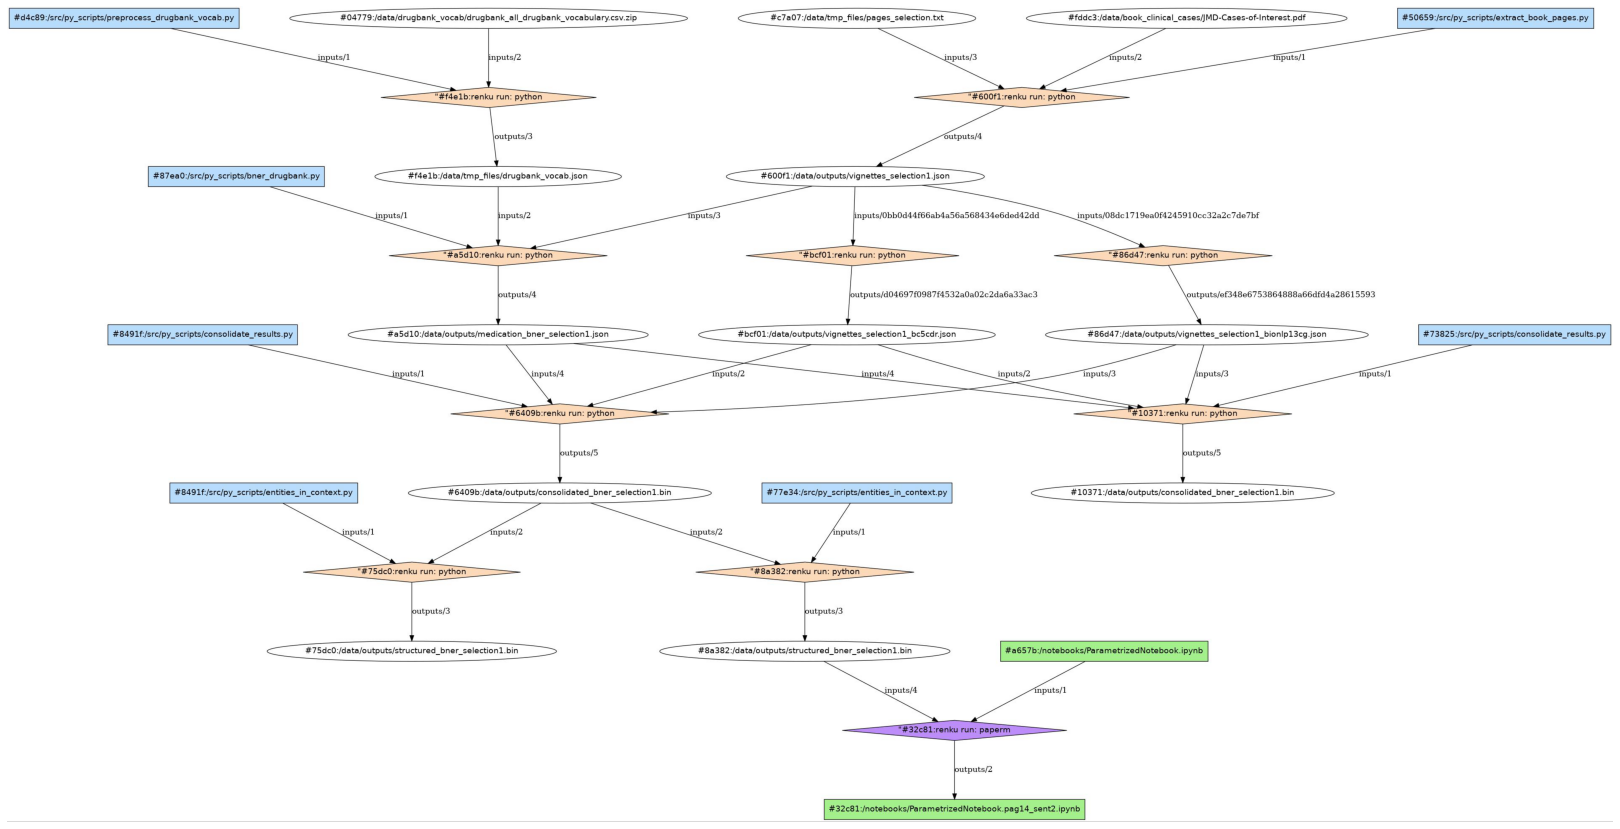

In [33]:
im = pilim.open("/tmp/lineage1.jpg")

fig,ax = plt.subplots(1,1, figsize = (30,15))
ax.imshow(im)
ax.axis("off");

**Notes / Observations:**

The edges of the diagram contain 2 types of labels:

- "inputs/1", "inputs/2", "outputs/1", etc
   * when renku automatically detected inputs and outputs provided as arguments to the python script in cli,
   * when we explicitly specified inputs/outputs (with ` --no-output-detection --output`)
- "inputs/0bb0d44f66ab4a56a568434e6ded42dd", etc
   * when we used renku-python package in the script to create Input, Output and Parameter objects
   * when we used .renku/tmp/output.txt to provide on separate lines the paths to the output files to record as outputs
   
In the case when renku-python package was used in the Python script, we see that the graph lacks the node for the script (more precisely "src/py_scripts/bner_scispacy.py")

----------------

# Appendices

### Appendix 1

In [34]:
%%bash

cd ..
renku log "$SELECTED_REPORT"

*    32c81170 notebooks/ParametrizedNotebook.pag14_sent2.ipynb
|\
+---*  b2e144b9 .renku/workflow/ea7202cf73774b09a73014a1ed03b532_papermill.yaml
| |/
| *    8a382741 data/outputs/structured_bner_selection1.bin
| |\
| +---*  b9225db1 .renku/workflow/94438762eb5345f09a54667c25df6342_python.yaml
| | |/
| | | @  77e34776 (latest -> a657b037) README.md
| | | *  77e34776 (latest -> 798ac16f) src/py_scripts/create_result_pdf.py
| | | |           (part of src/py_scripts directory)
| *---+  77e34776 src/py_scripts/entities_in_context.py
|  / /            (part of src/py_scripts directory)
| | | *  77e34776 (latest -> 8a382741) data/outputs/structured_bner_selection1.bin
| | | |           (part of data/outputs directory)
| | | *  77e34776 (latest -> 8a382741) data/outputs
| | | |           (part of data directory)
| | | @  77e34776 (latest -> 67fedd6d) data
| | *  77e34776 (latest -> 798ac16f) src/py_scripts
| | |           (part of src directory)
| | @  77e34776 (latest -> 798ac16f) src
| | * 

---------------------

### Appendix 2

In [35]:
!cat /tmp/lineage1.dot

digraph { 
 node [ fontname="DejaVu Sans" ] ; 
 	"c7a07:/data/tmp_files/pages_selection.txt" -> "600f1:" [label="inputs/3"] 
	"fddc3:/data/book_clinical_cases/JMD-Cases-of-Interest.pdf" -> "600f1:" [label="inputs/2"] 
	"50659:/src/py_scripts/extract_book_pages.py" -> "600f1:" [label="inputs/1"] 
	"bcf01:/data/outputs/vignettes_selection1_bc5cdr.json" -> "6409b:" [label="inputs/2"] 
	"8491f:/src/py_scripts/consolidate_results.py" -> "6409b:" [label="inputs/1"] 
	"a5d10:/data/outputs/medication_bner_selection1.json" -> "6409b:" [label="inputs/4"] 
	"86d47:/data/outputs/vignettes_selection1_bionlp13cg.json" -> "6409b:" [label="inputs/3"] 
	"6409b:/data/outputs/consolidated_bner_selection1.bin" -> "75dc0:" [label="inputs/2"] 
	"8491f:/src/py_scripts/entities_in_context.py" -> "75dc0:" [label="inputs/1"] 
	"77e34:/src/py_scripts/entities_in_context.py" -> "8a382:" [label="inputs/1"] 
	"6409b:/data/outputs/consolidated_bner_selection1.bin" -> "8a382:" [label="inputs/2"] 
	"d4c89:/src/py_scri